In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
import sklearn as sk
import scipy.stats as stats
import plotly.express as px

DATA PREPROCESSING

In [2]:
data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(1190, 12)

In [5]:
data.info

<bound method DataFrame.info of       age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0  

In [6]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [8]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [9]:
data.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [10]:
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [11]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
max heart rate         0.413278
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
cholesterol            0.198366
resting bp s           0.121415
resting ecg            0.073059
Name: target, dtype: float64


In [12]:
target_temp = data.target.value_counts()

In [13]:
print(target_temp)

1    629
0    561
Name: target, dtype: int64


In [14]:
print("Percentage of patient without heart disease: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patient with heart disease: "+str(round(target_temp[1]*100/303,2)))

Percentage of patient without heart disease: 185.15
Percentage of patient with heart disease: 207.59


In [15]:
y = data['target']

In [16]:
data["chest pain type"].unique()

array([2, 3, 4, 1], dtype=int64)

DATA ANALYSIS

c:\Users\THRISHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chest pain type', ylabel='target'>

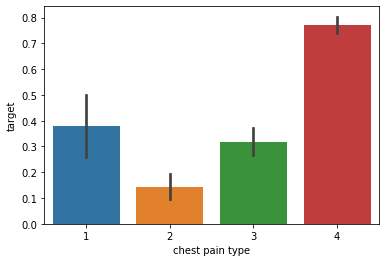

In [17]:
sns.barplot(data["chest pain type"],y)

In [18]:
data["sex"].unique()

array([1, 0], dtype=int64)

c:\Users\THRISHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

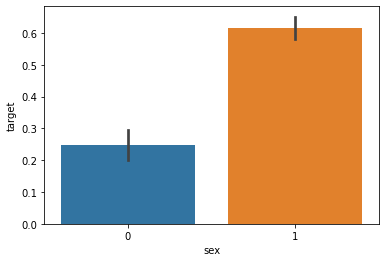

In [19]:
sns.barplot(data["sex"],y)

In [21]:
data["target"].value_counts()

1    629
0    561
Name: target, dtype: int64

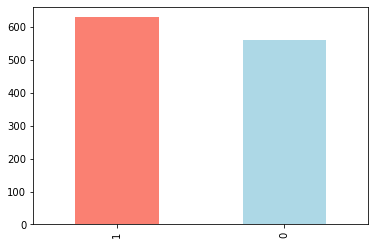

In [22]:
data["target"].value_counts().plot(kind = "bar", color = ["salmon","lightblue"]);

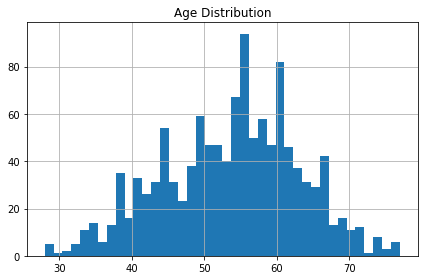

In [24]:
data['age'].hist(bins = 40)
plt.title("Age Distribution")
plt.tight_layout()
plt.show()

c:\Users\THRISHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


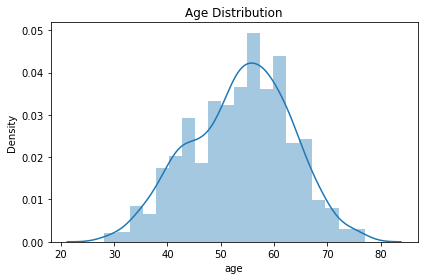

In [25]:
sns.distplot(data['age'])
plt.title("Age Distribution")
plt.tight_layout()

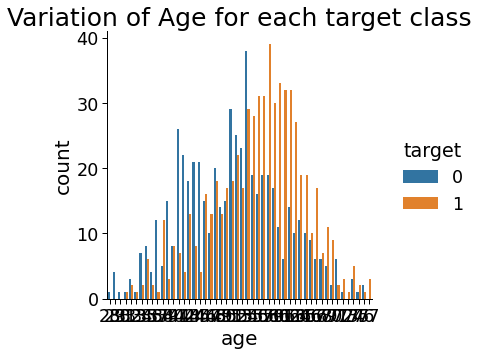

In [26]:
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = data, x = 'age', hue = 'target', order = data['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

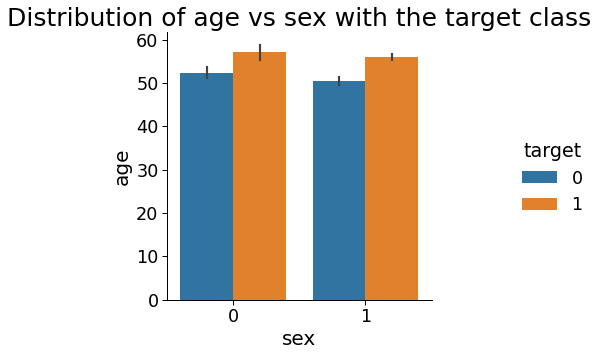

In [27]:
sns.catplot(kind = 'bar', data = data, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [28]:
data['sex'].value_counts()

1    909
0    281
Name: sex, dtype: int64

c:\Users\THRISHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x22dd9450ca0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

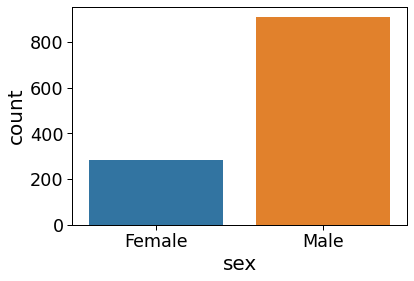

In [29]:
sns.countplot(data['sex'])
plt.xticks([0,1],['Female','Male'])

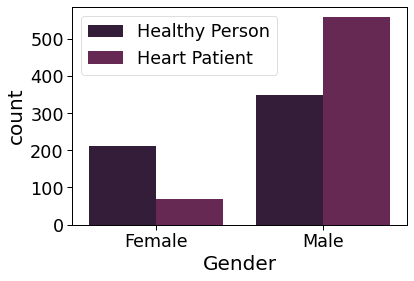

In [30]:
sns.set_palette("rocket")
sns.countplot(x = 'sex', hue = 'target', data = data)
plt.xticks([0,1],['Female','Male'])
plt.xlabel("Gender")
plt.legend(labels=['Healthy Person', 'Heart Patient'])

CHEST PAIN TYPES
1: Typical Angina
2: Atypical Angina
3: Non Anginal Pain
4: Asymptomatic

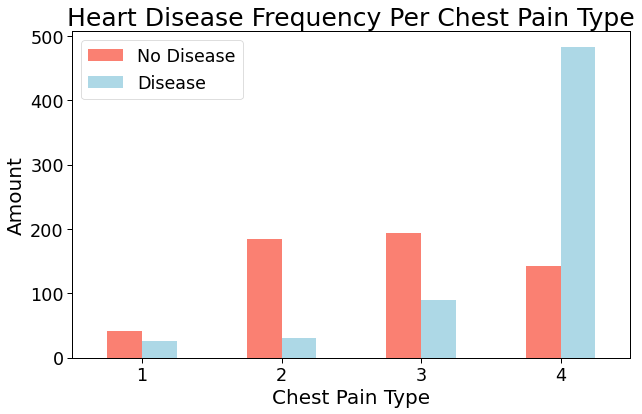

In [31]:
pd.crosstab(data['chest pain type'], data['target']).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

<AxesSubplot:xlabel='chest pain type'>

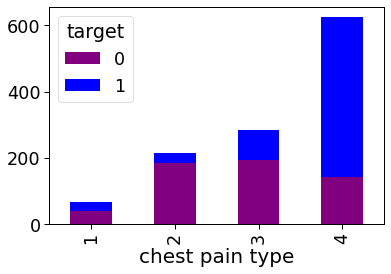

In [32]:
chest_pain=pd.crosstab(data['chest pain type'], data['target'])
chest_pain
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

<AxesSubplot:>

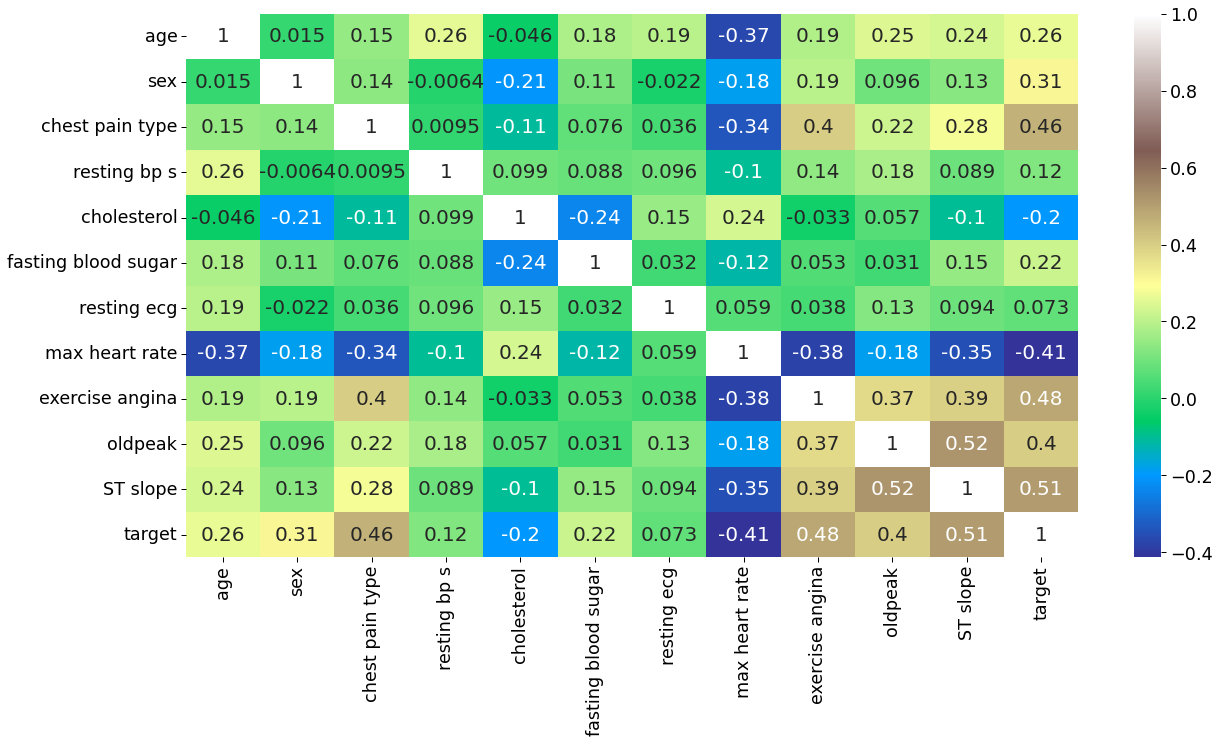

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='terrain')

<Figure size 3600x3600 with 0 Axes>

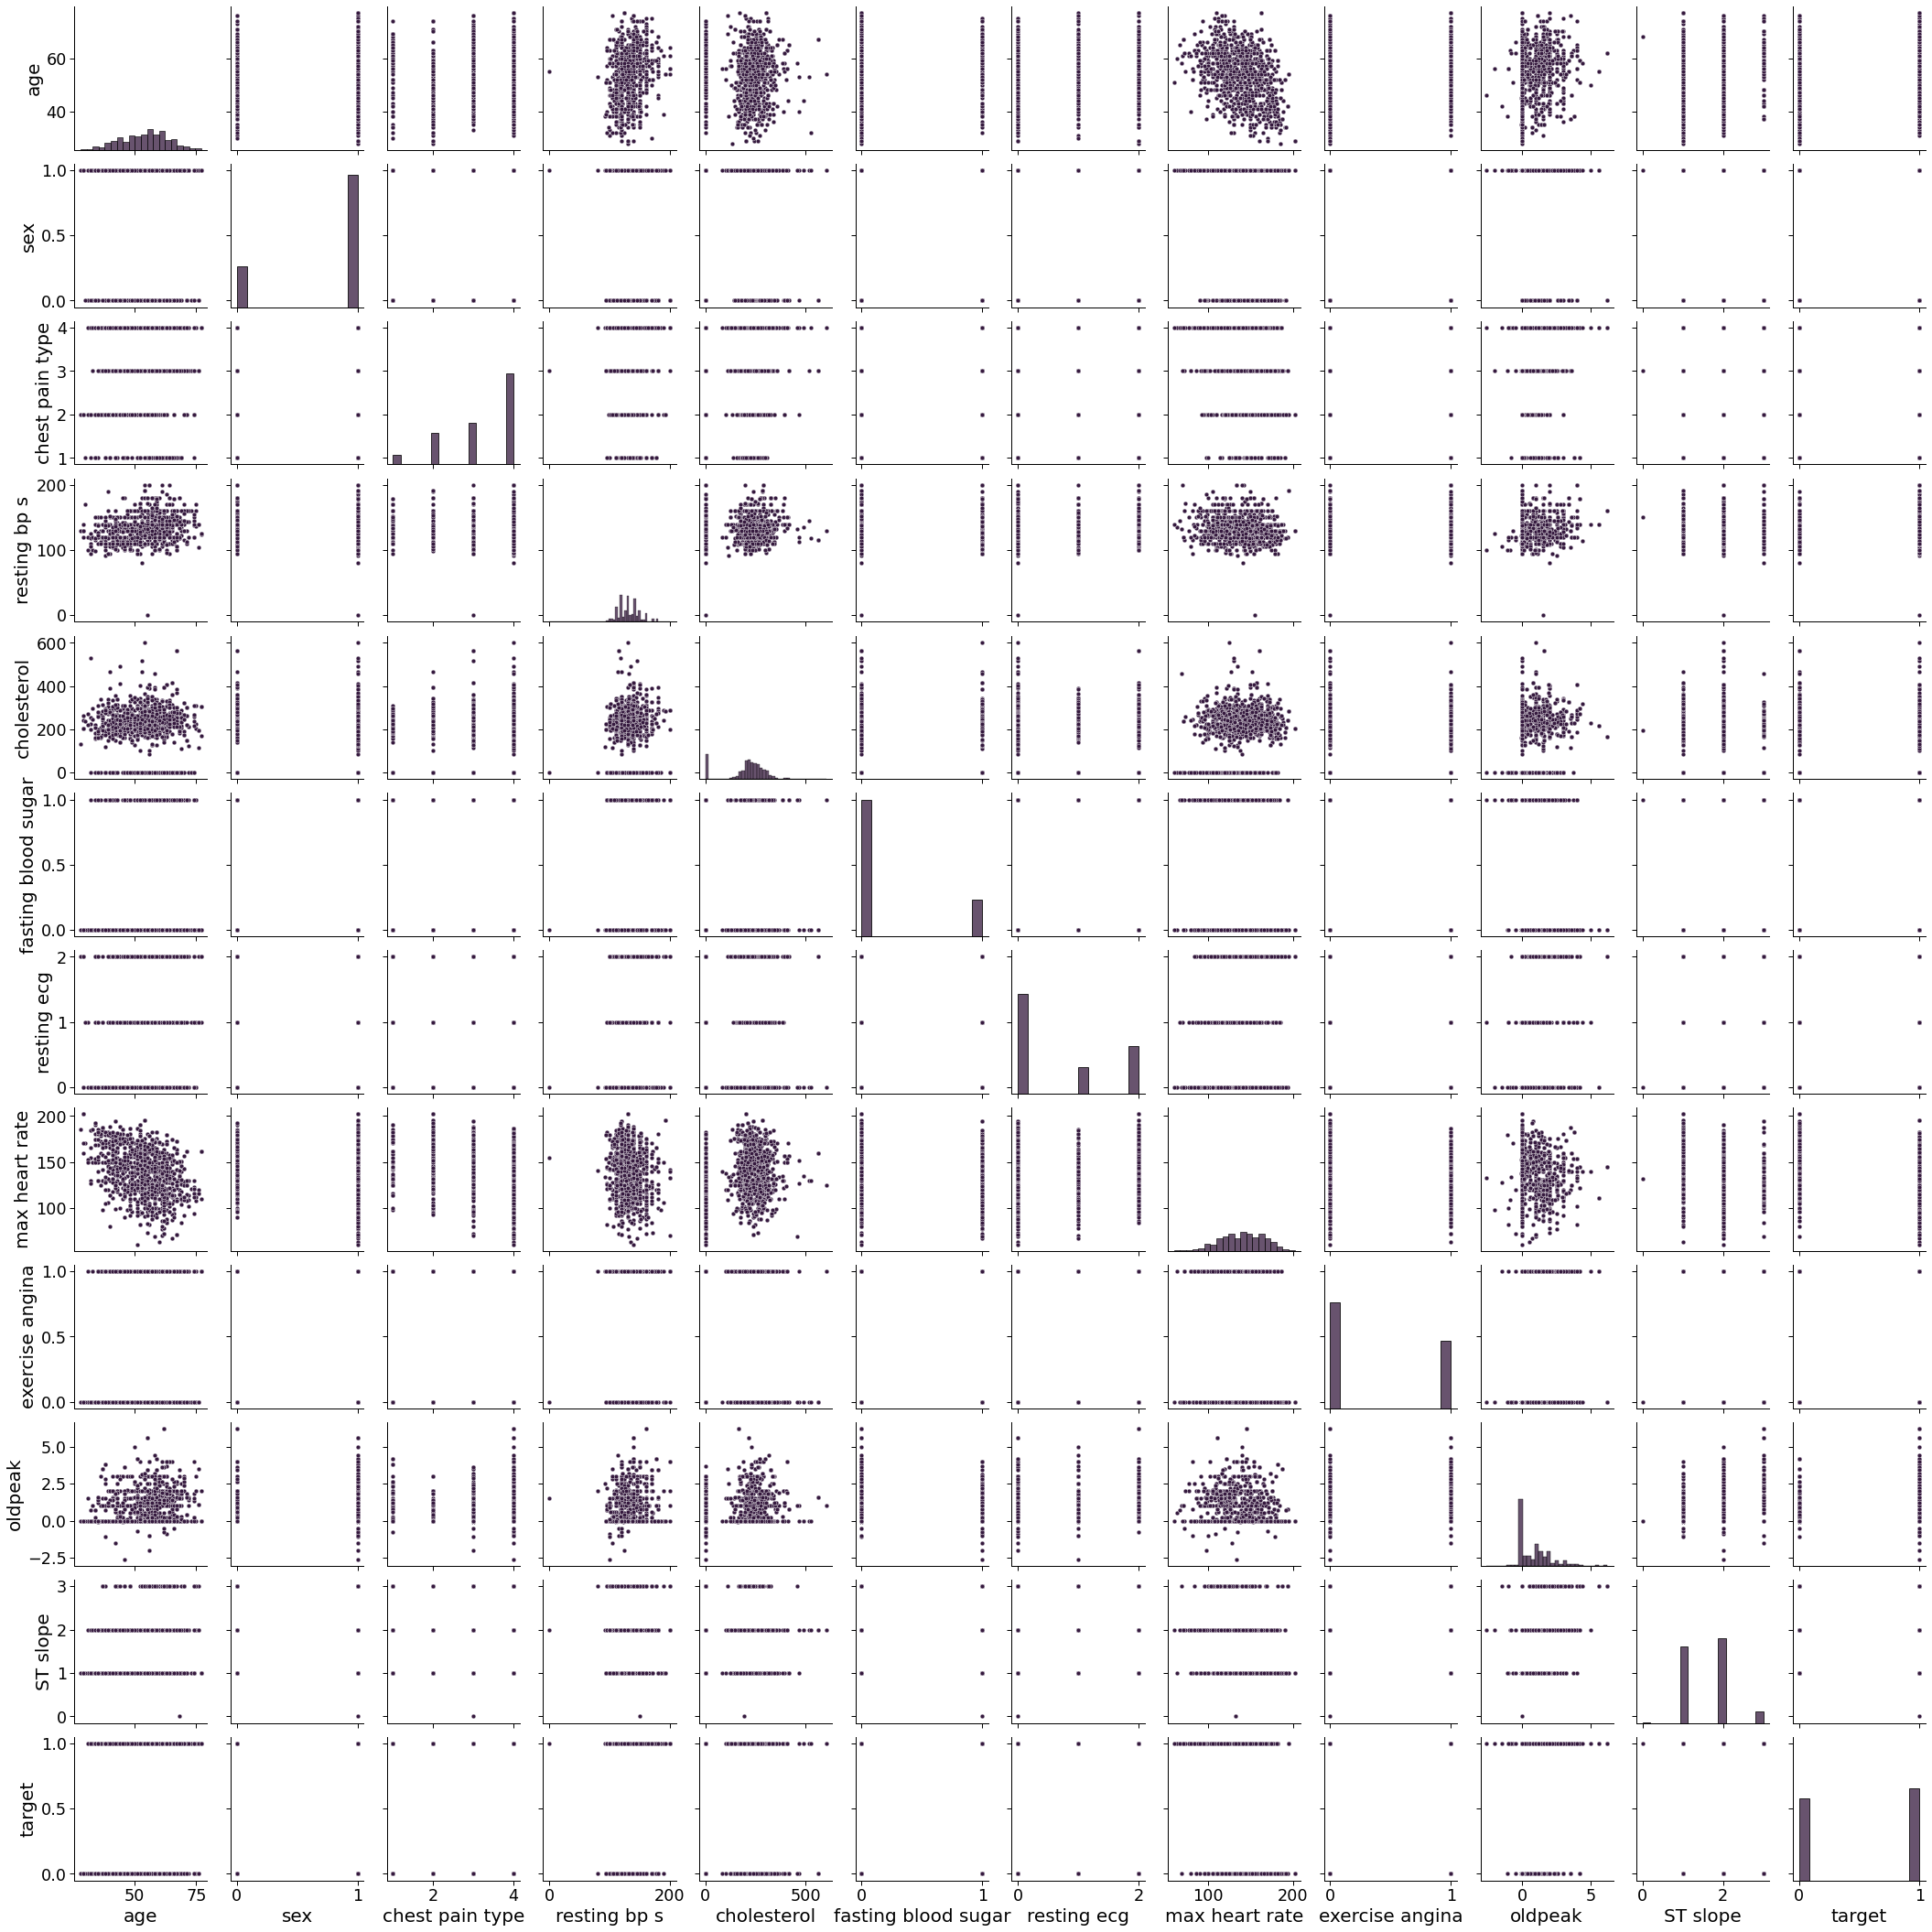

In [34]:
plt.figure(figsize=(50,50))
sns.pairplot(data=data)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest pain type'}>],
       [<AxesSubplot:title={'center':'resting bp s'}>,
        <AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'fasting blood sugar'}>],
       [<AxesSubplot:title={'center':'resting ecg'}>,
        <AxesSubplot:title={'center':'max heart rate'}>,
        <AxesSubplot:title={'center':'exercise angina'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'ST slope'}>,
        <AxesSubplot:title={'center':'target'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

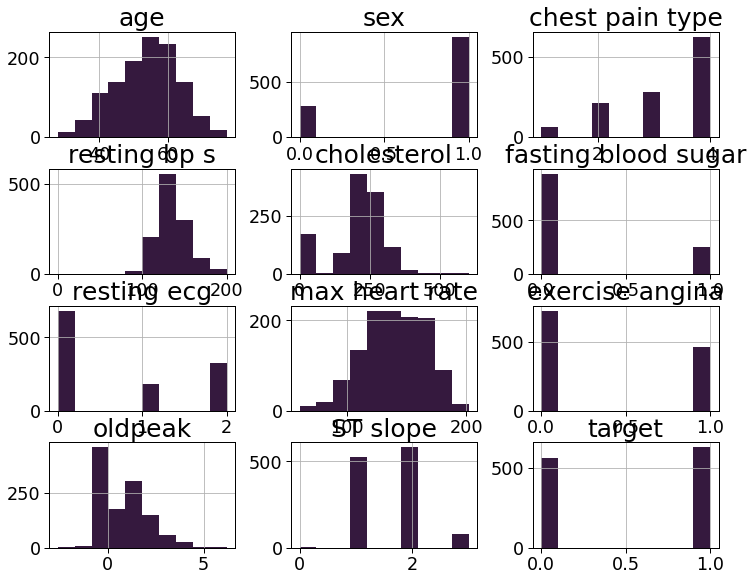

In [35]:
data.hist(figsize=(12,12), layout=(5,3))

SEX
0: Female
1: Male

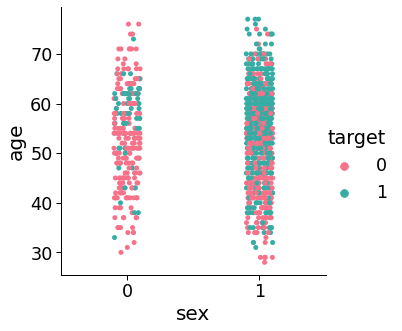

In [37]:
sns.catplot(data=data, x='sex', y='age', hue='target', palette='husl')

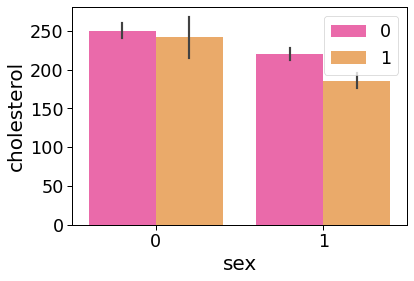

In [38]:
sns.barplot(data=data, x='sex', y='cholesterol', hue='target', palette='spring')
plt.legend(loc='upper right')

<AxesSubplot:xlabel='chest pain type', ylabel='count'>

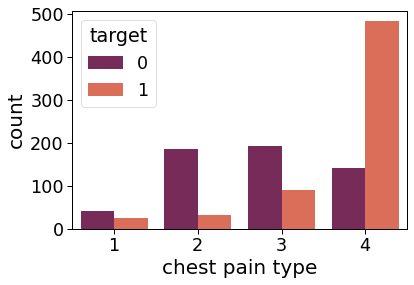

In [39]:
sns.countplot(x='chest pain type', hue='target', data=data, palette='rocket')

In [40]:
#data['target'].replace([0,1],["Absence of Heart Disease","Presence of Heart Disease"], inplace=True)

CLASSIFICATION ALGORITHMS

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
predictors = data.drop("target",axis = 1)
target = data['target']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(predictors,target,test_size=0.20,random_state=1)

In [44]:
print('The shape of X_train is : ',X_train.shape)
print('The shape of X_test is : ',X_test.shape)


The shape of X_train is :  (952, 11)
The shape of X_test is :  (238, 11)


In [45]:
print('The shape of Y_train is : ',y_train.shape)
print('The shape of Y_test is : ',y_test.shape)

The shape of Y_train is :  (952,)
The shape of Y_test is :  (238,)


In [46]:
from sklearn.linear_model import LogisticRegression

EVALUATION METRICS

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [49]:
ss = StandardScaler()
columns_to_scale = ['age','resting bp s','cholesterol','oldpeak']
data[columns_to_scale] = ss.fit_transform(data[columns_to_scale])

LOGISTIC REGRESSION

In [50]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
Y_pred_lr = lr.predict(X_test)
Y_pred_lr.shape
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 83.61 %


c:\Users\THRISHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
cm = confusion_matrix(y_test, Y_pred_lr)
cm

array([[ 92,  19],
       [ 20, 107]], dtype=int64)

<AxesSubplot:>

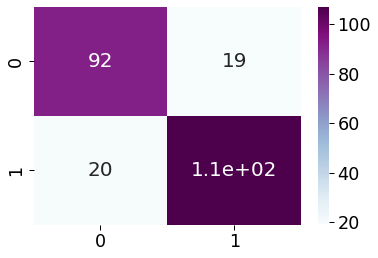

In [52]:
sns.heatmap(cm,annot = True, cmap = 'BuPu')

In [53]:
print(classification_report(y_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       111
           1       0.85      0.84      0.85       127

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



NAIVE BAYES

In [54]:
from sklearn.naive_bayes import GaussianNB

In [56]:
nb = GaussianNB()
nb.fit(X_train,y_train)
Y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 86.97 %


In [57]:
cm = confusion_matrix(y_test, Y_pred_nb)
cm

array([[ 98,  13],
       [ 18, 109]], dtype=int64)

<AxesSubplot:>

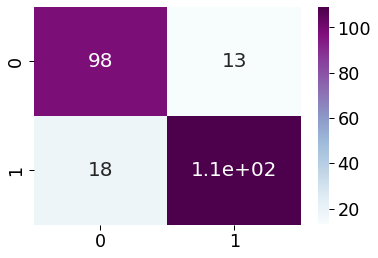

In [58]:
sns.heatmap(cm, annot = True, cmap = 'BuPu')

In [59]:
print(classification_report(y_test,Y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       111
           1       0.89      0.86      0.88       127

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238



SUPPORT VECTOR MACHINE(SVM)

In [60]:
from sklearn.svm import SVC

In [61]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Support Vector Machine is: "+str(score_svm)+"%")

The accuracy score achieved using Support Vector Machine is: 71.85%


In [62]:
cm = confusion_matrix(y_test,y_pred_svm)
cm

array([[79, 32],
       [35, 92]], dtype=int64)

<AxesSubplot:>

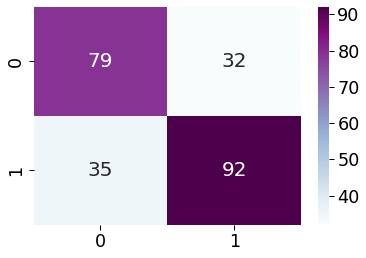

In [63]:
sns.heatmap(cm, annot = True, cmap = 'BuPu')

In [64]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       111
           1       0.74      0.72      0.73       127

    accuracy                           0.72       238
   macro avg       0.72      0.72      0.72       238
weighted avg       0.72      0.72      0.72       238



K NEAREST NEIGHBORS

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNeighbors Classifier is: "+str(score_knn)+"%")

The accuracy score achieved using KNeighbors Classifier is: 70.17%


In [67]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[ 67,  44],
       [ 27, 100]], dtype=int64)

<AxesSubplot:>

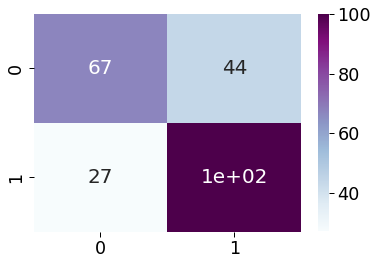

In [68]:
sns.heatmap(cm, annot = True, cmap = 'BuPu')

In [69]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65       111
           1       0.69      0.79      0.74       127

    accuracy                           0.70       238
   macro avg       0.70      0.70      0.70       238
weighted avg       0.70      0.70      0.70       238



DECISION TREE

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 93.28 %


In [72]:
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[108,   3],
       [ 13, 114]], dtype=int64)

<AxesSubplot:>

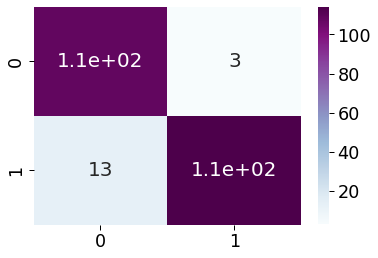

In [73]:
sns.heatmap(cm, annot = True, cmap = 'BuPu')

In [74]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       111
           1       0.97      0.90      0.93       127

    accuracy                           0.93       238
   macro avg       0.93      0.94      0.93       238
weighted avg       0.94      0.93      0.93       238



RANDOM FOREST

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
max_accuracy = 0

for x in range(500):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+"%")

The accuracy score achieved using Random Forest is: 95.8%


In [77]:
cm = confusion_matrix(y_test,y_pred_rf)
cm

array([[106,   5],
       [  5, 122]], dtype=int64)

<AxesSubplot:>

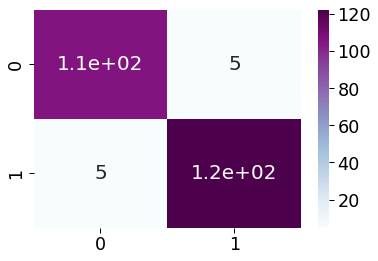

In [78]:
sns.heatmap(cm, annot = True, cmap = 'BuPu')

In [79]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       111
           1       0.96      0.96      0.96       127

    accuracy                           0.96       238
   macro avg       0.96      0.96      0.96       238
weighted avg       0.96      0.96      0.96       238



MODEL COMPARISON

In [80]:
scores = [score_dt,score_lr,score_svm,score_nb,score_knn,score_rf]
algorithms = ["Decision Tree","Logistic Regression","Support Vector Machine","Naive Bayes","K-Nearest Neighbors","Random Forest"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+"%")

The accuracy score achieved using Decision Tree is: 93.28%
The accuracy score achieved using Logistic Regression is: 83.61%
The accuracy score achieved using Support Vector Machine is: 71.85%
The accuracy score achieved using Naive Bayes is: 86.97%
The accuracy score achieved using K-Nearest Neighbors is: 70.17%
The accuracy score achieved using Random Forest is: 95.8%


c:\Users\THRISHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Machine Learning Algorithms', ylabel='Accuracy scores'>

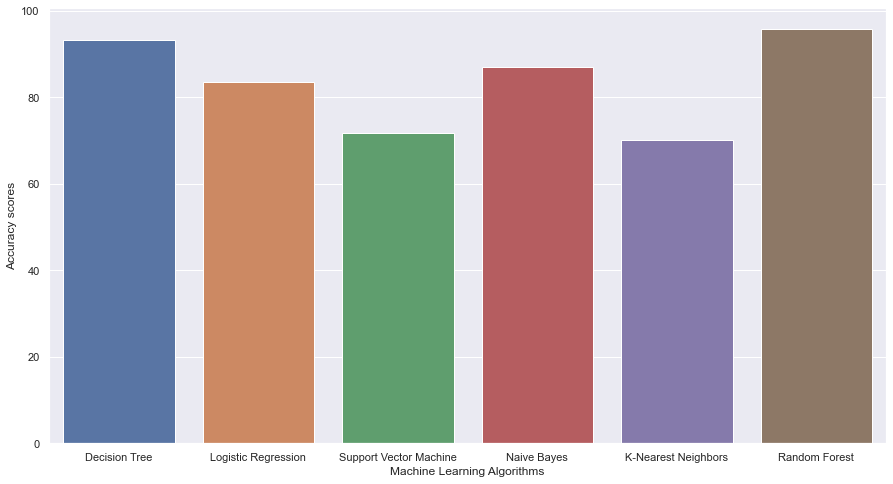

In [82]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Accuracy scores")

sns.barplot(algorithms,scores)

In [83]:
scores_new = [score_knn,score_svm,score_lr,score_nb,score_dt,score_rf]
algorithms_new = ["K-Nearest Neighbors","Support Vector Machine","Logistic Regression","Naive Bayes","Decision Tree","Random Forest"]

for i in range(len(algorithms_new)):
    print("The accuracy score achieved using "+algorithms_new[i]+" is: "+str(scores_new[i])+"%")

The accuracy score achieved using K-Nearest Neighbors is: 70.17%
The accuracy score achieved using Support Vector Machine is: 71.85%
The accuracy score achieved using Logistic Regression is: 83.61%
The accuracy score achieved using Naive Bayes is: 86.97%
The accuracy score achieved using Decision Tree is: 93.28%
The accuracy score achieved using Random Forest is: 95.8%


<AxesSubplot:>

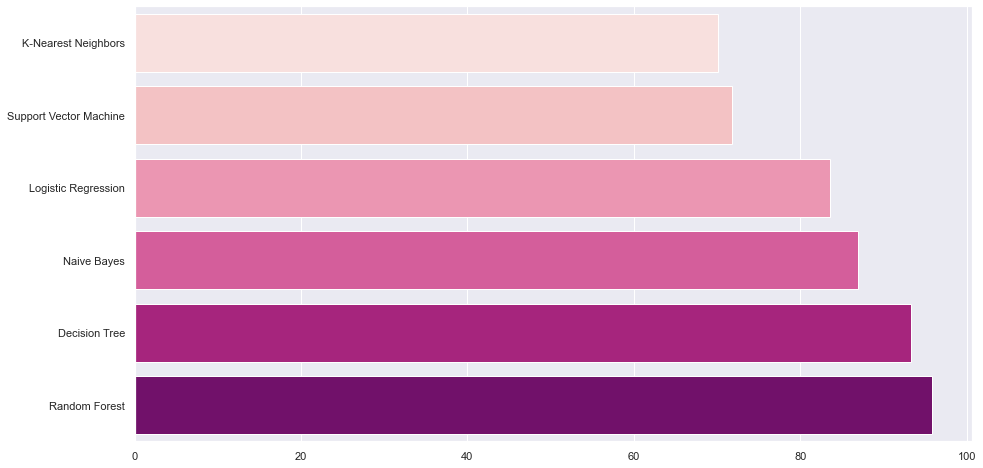

In [84]:
sns.barplot(x=scores_new, y=algorithms_new, data = data, palette = 'RdPu')

<AxesSubplot:>

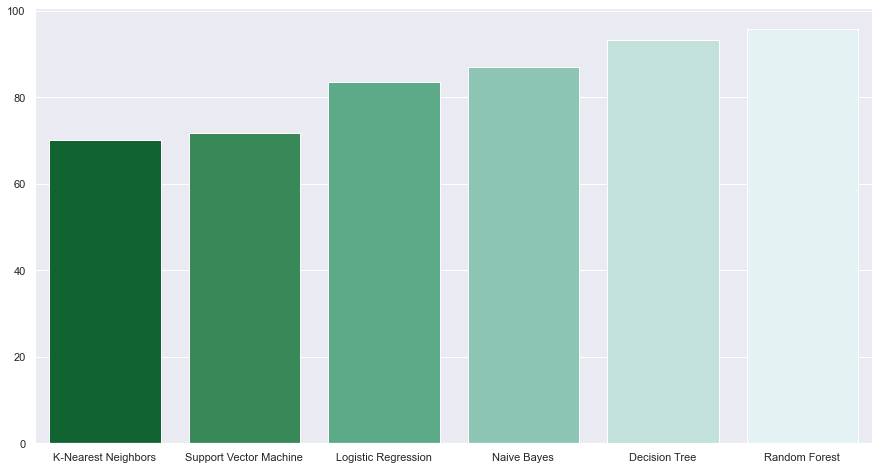

In [85]:
sns.barplot(x=algorithms_new, y =scores_new, data = data, palette = 'BuGn_r')

PREDICTION

In [86]:
age = int(input("Enter your age: "))
gender = int(input("Enter your gender: [0]:Female, [1]:Male: "))
chest_pain_type = int(input("Enter your chest pain type:[1,2,3,4]: "))
rest_bp = int(input("Enter your resting blood pressure on admission to hospital:[94 to 200]: "))
cholesterol = int(input("Enter your cholesterol value:[126 to 564]: "))
fast_blood_sugar = int(input("Enter fasting blood sugar value:[0 or 1]: "))
rest_ecg = int(input("Enter your resting ecg value:[0,1]: "))
max_heart_rate = int(input("Enter the value of maximum heart rate:[71 to 202]: "))
exercise_angina = int(input("Enter the value for exercise induced angina:[0]:No, [1]:Yes: "))
old_peak = float(input("Enter the value for oldpeak[0 to 3]: "))
st_slope = int(input("Enter your ST slope[1, 2]: "))
test = np.array([[age,gender,chest_pain_type,rest_bp,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_slope,old_peak]])
prediction = rf.predict(test)


In [87]:
if prediction == 0:
    print("Absence of Heart Disease")
else:
    print("Presence of Heart Disease")

Presence of Heart Disease
